<a href="https://colab.research.google.com/github/heejvely/Deep_learning/blob/main/%EC%98%A4%EC%B0%A8_%EC%88%98%EC%A0%95%ED%95%98%EA%B8%B0_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 기울기 a를 너무 크게 잡거나 너무 작게 잡으면 오차가 커짐. 오차와 기울기 사이에는 상관관계가 있음.
- 오차가 가장 작은 점은 기울기 a가 m에 위치해 있을때 이므로, m으로 이동시키는 과정이 필요함.
- 미분 기울기를 이용한 경사하강법(gradient descent)를 통해 오차를 비교하여 가장 작은 방향으로 이동시켜야함.
- 최솟값 m에서의 순간 기울기는 x축과 평행한 선, 즉 기울기가 0임.

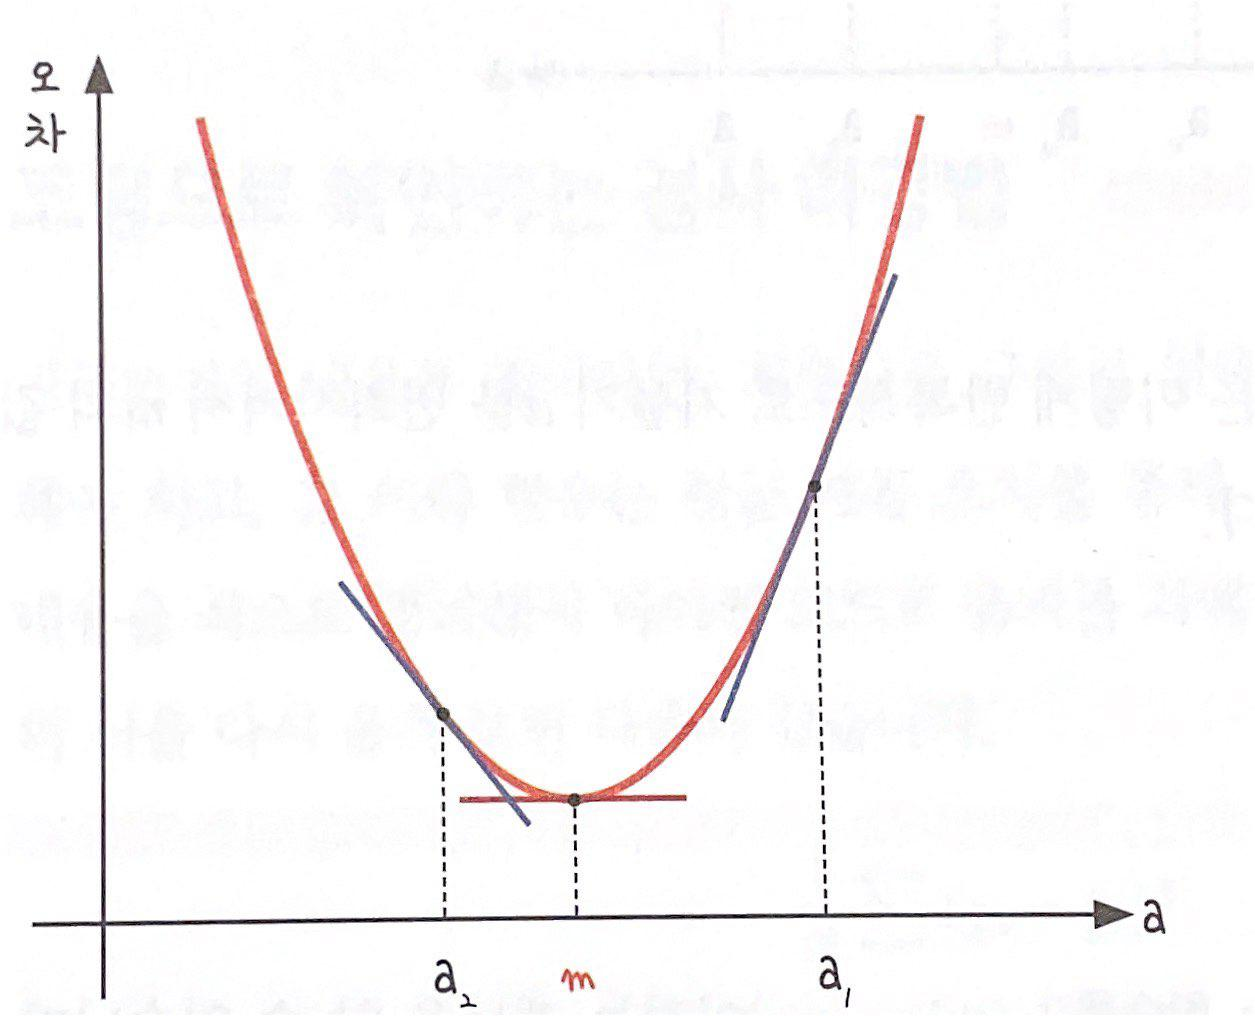

## - '미분값이 0인 지점'을 찾아 오차를 가장 적게 만들어야 함.

1. a₁에서 미분을 구한다.
2. 구해진 기울기의 반대 방향(기울기가 +면 음의 방향, -면 양의 방향)으로 얼마간 이동시킨 a₂에서 미분을 구한다.
3. 위에서 구한 미분 값이 0이 아니면 위 과정을 반복한다.

- 경사 하강법은 이렇게 반복적으로 기울기 a를 변화시켜서 m의 값을 찾아내는 방법
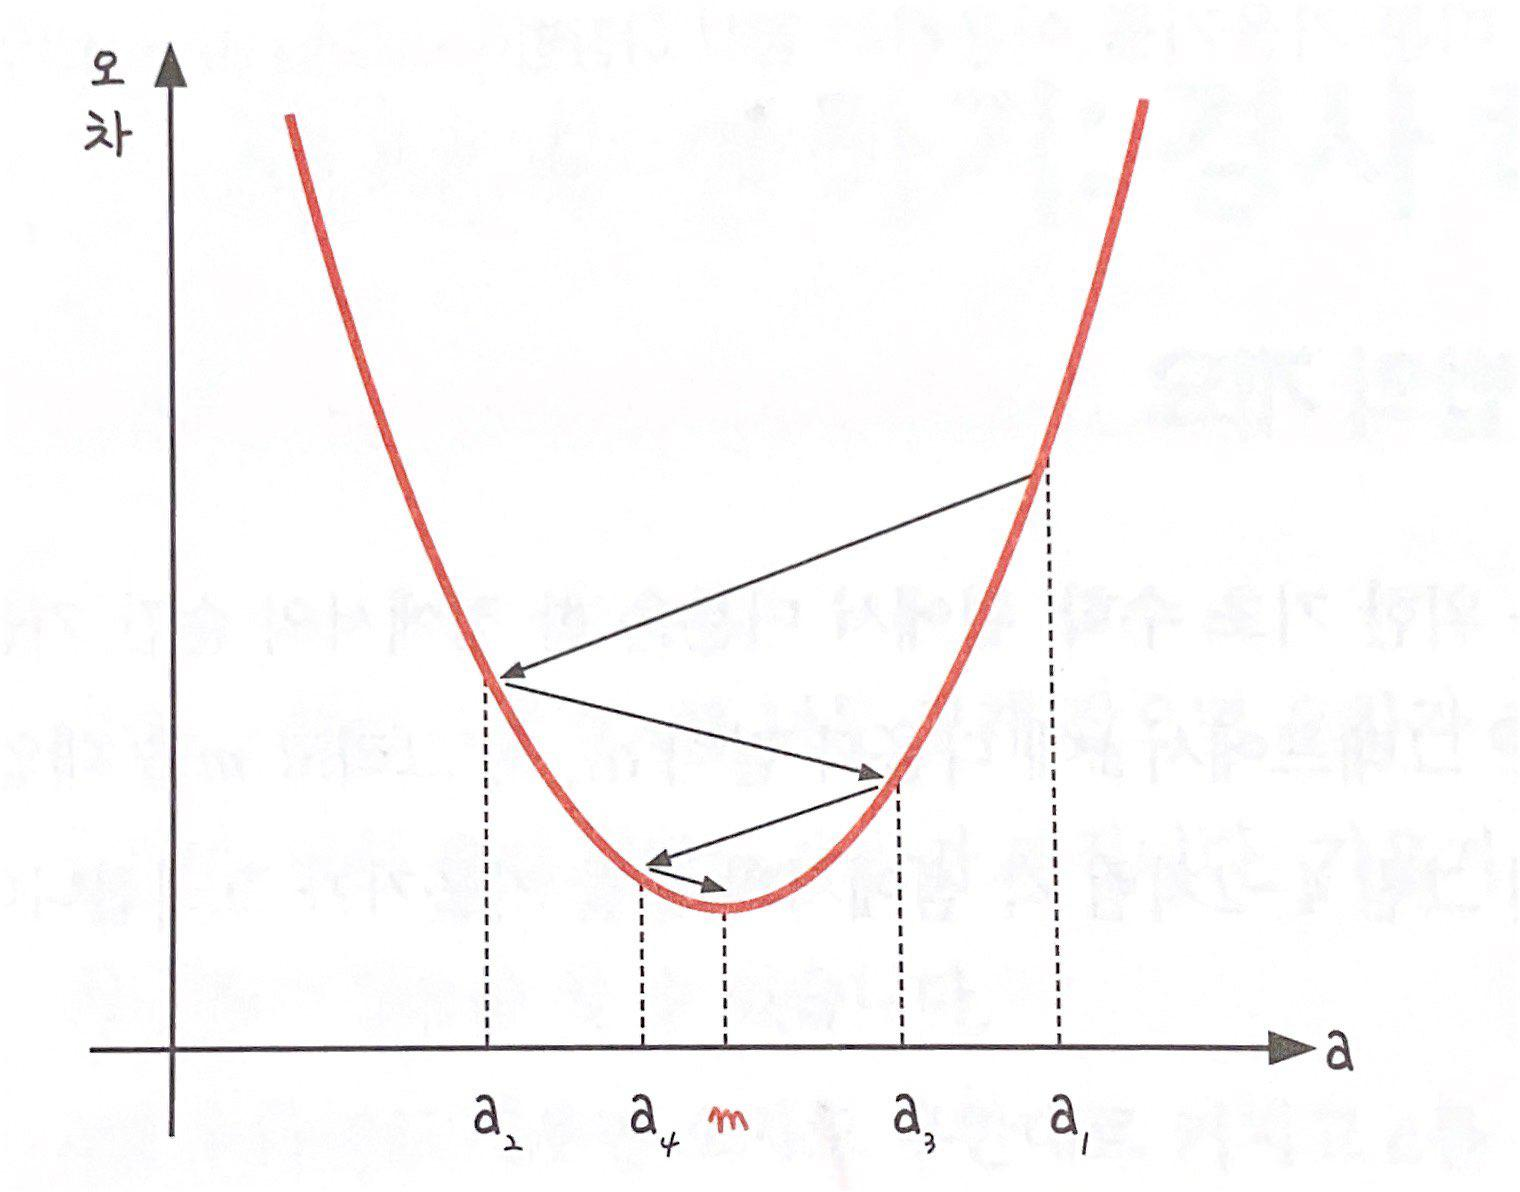

## 학습률(learning rate)

- 기울기의 부호를 바꿔 이동시킬 때 적절한 거리를 찾지 못해 너무 이동시키면 a값이 한 점으로 모이지 않고 위로 치솟아 버림.
- 따라서 어느 만큼 이동시킬지를 신중히 결정해야하고, 이때 이동거리를 정해주는 것이 바로 학습률임.
- 학습률의 값을 적절히 바꾸면서 최적의 학습률을 찾는 것은 중요한 최적화 과정 중 하나임.
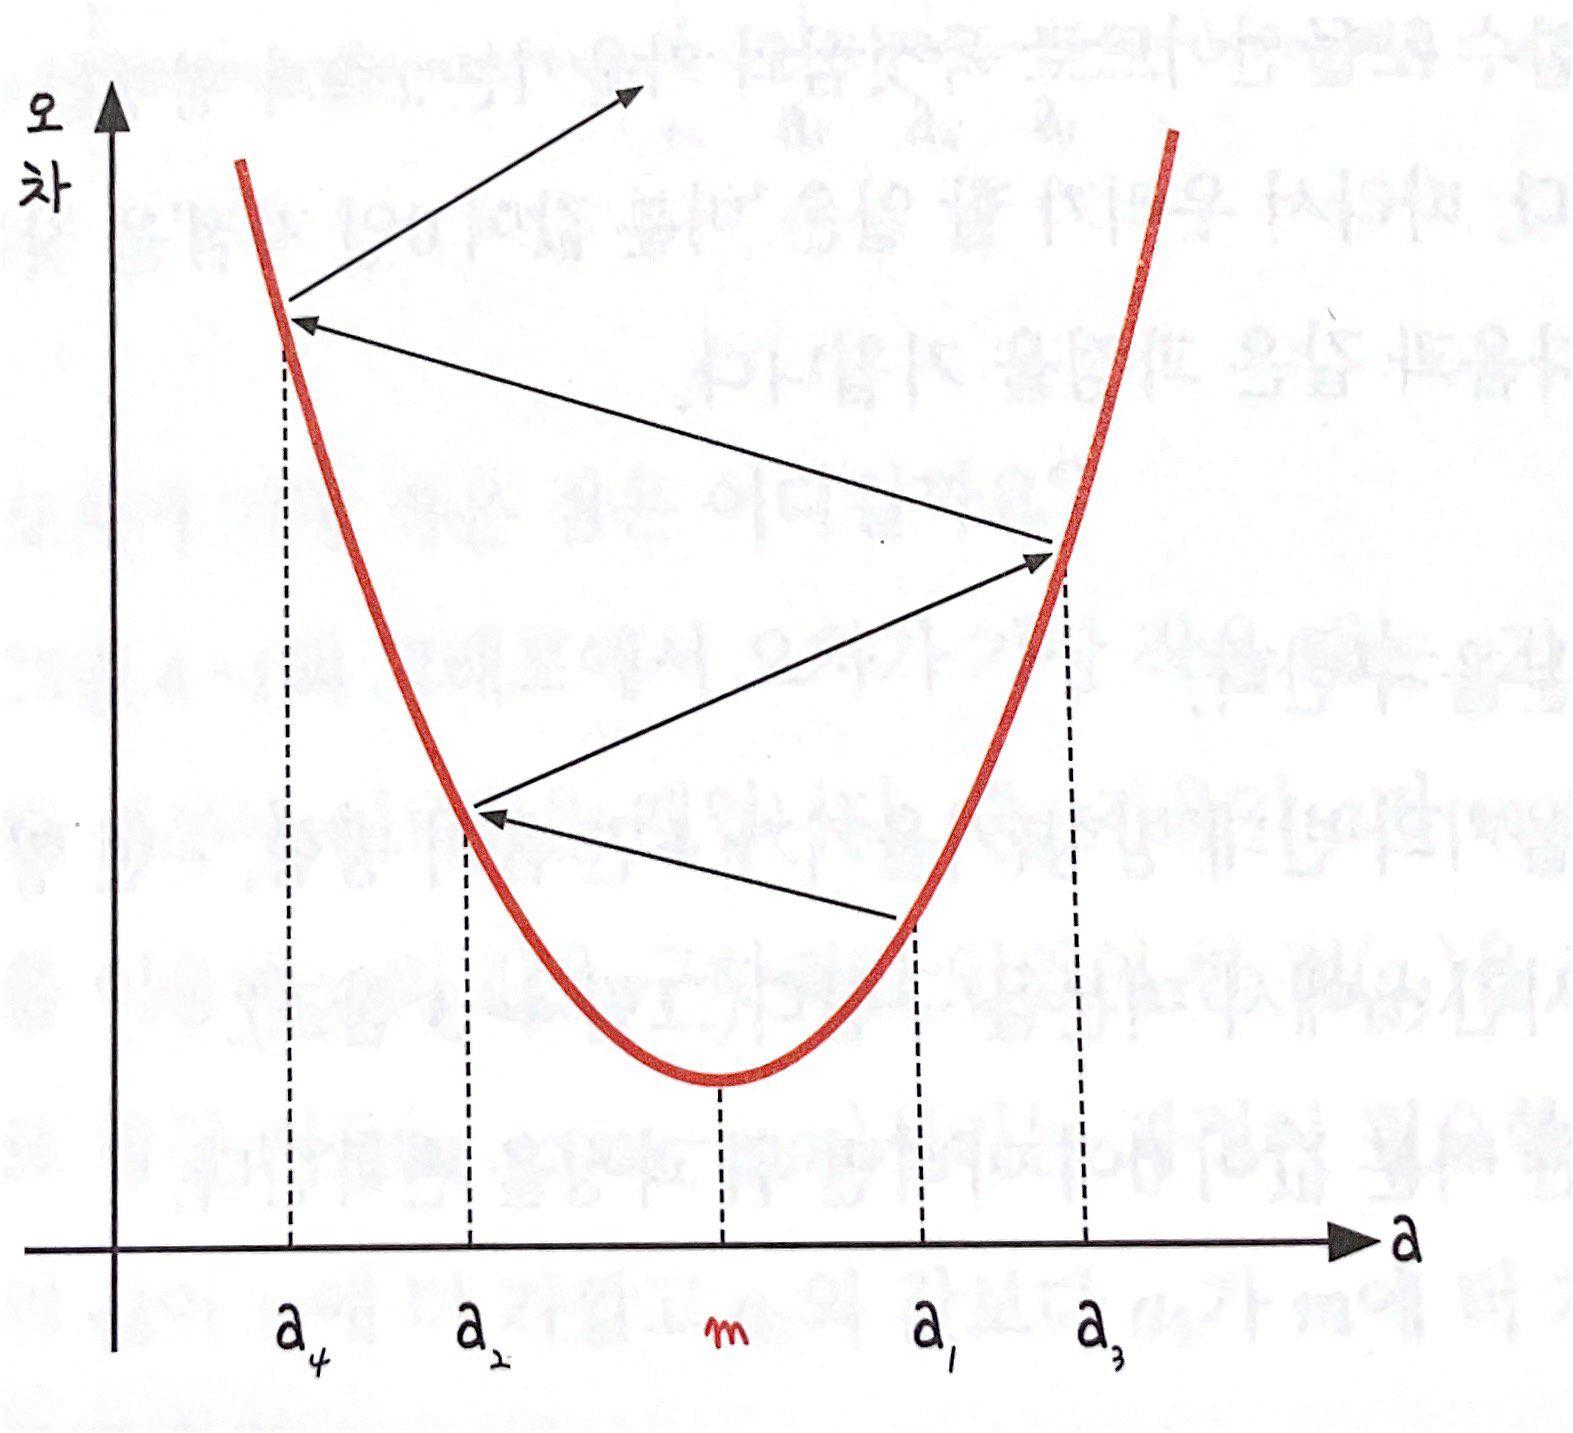

## 최솟값을 구하시 위해서는 이차 함수에서 미분을 하고, 그 이차 함수는 평균 제곱 오차를 통해 나옴. 값을 미분할 때는 기울기 a 또는 절편 b임. 식 전체를 미분하는 것이 아니라 필요한 값을 중심으로 미분해야하기 때문에 편미분해야함.

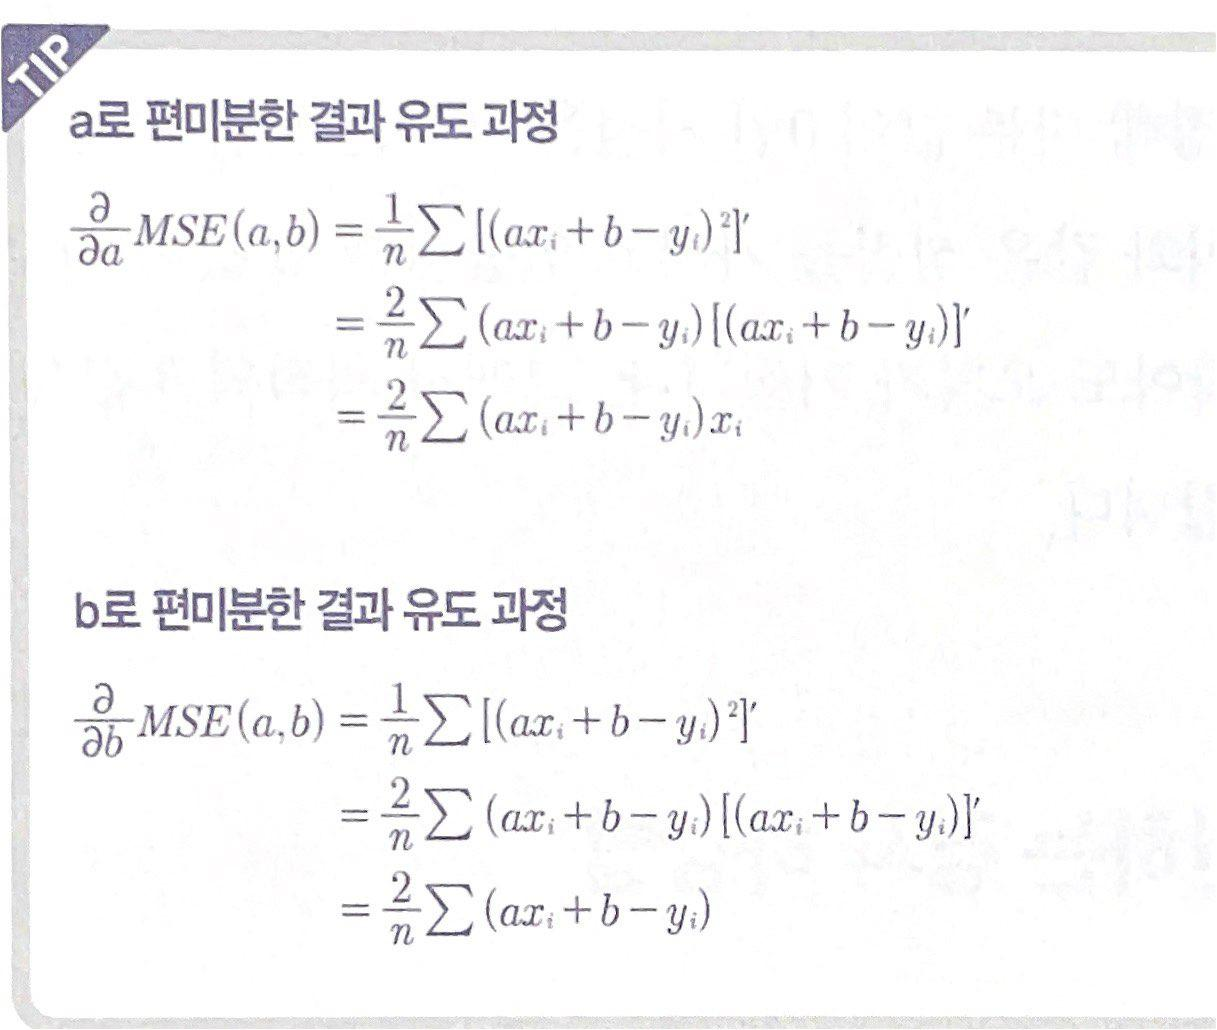

In [ ]:
# 편미분 코드로 구축

y_pred = a* x_data + b    # 오차 함수인 y = ax + b를 정의한 부분
error = y_data - y_pred   # 실제값 - 예측값, 오차를 구하는 식

# 평균 제곱 오차를 a로 미분한 결과
a_diff = -(2 / len(x_data)) * sum(x_data * (error))
# 평균 제곱 오차를 b로 미분한 결과
b_diff = -(2 / len(x_data)) * sum(error)

a = a - lr * a_diff       # 미분 결과에 학습률을 곱한 후 기존의 a값을 업데이트
b = b - lr * b_diff       # 미분 결과에 학습률을 곱한 후 기존의 b값을 업데이트

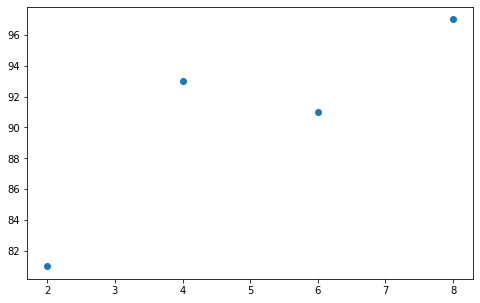

epoch=0, 기울기=27.84, 절편=5.43
epoch=100, 기울기=7.073858435872394, 절편=50.51166161138297
epoch=200, 기울기=4.095999380762421, 절편=68.28224379060177
epoch=300, 기울기=2.9756829100119027, 절편=74.96781336233505
epoch=400, 기울기=2.5542024233262106, 절편=77.48302865233052
epoch=500, 기울기=2.3956349066513707, 절편=78.42929177728175
epoch=600, 기울기=2.3359793398132864, 절편=78.78529068727728
epoch=700, 기울기=2.313535987420573, 절편=78.91922301600925
epoch=800, 기울기=2.3050924490666174, 절편=78.96961044185792
epoch=900, 기울기=2.3019158585694823, 절편=78.98856697541248
epoch=1000, 기울기=2.3007207758016315, 절편=78.99569871827002
epoch=1100, 기울기=2.300271167070735, 절편=78.99838179089187
epoch=1200, 기울기=2.3001020172709508, 절편=78.9993912045567
epoch=1300, 기울기=2.300038380484562, 절편=78.99977096168232
epoch=1400, 기울기=2.3000144393354365, 절편=78.9999138322214
epoch=1500, 기울기=2.3000054323026444, 절편=78.99996758234106
epoch=1600, 기울기=2.300002043716771, 절편=78.99998780397235
epoch=1700, 기울기=2.3000007688780433, 절편=78.99999541166466
epoch=1800, 기울기=2.30

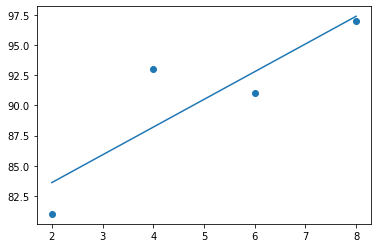

In [4]:
# 경사 하강법 실습
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 공부 시간 x와 성적 y의 리스트를 만들기
data = [[2,81],[4,93],[6,91],[8,97]]
x = [i[0] for i in data]
y = [i[1] for i in data]

# 그래프로 나타내기
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.show()

# 리스트로 되어 있는 x와 y값을 넘파이 배열로 바꾸기(인덱스를 주어 하나씩 불러와 계산이 가능하게 하기 위함.)
x_data = np.array(x)
y_data = np.array(y)

# 기울기 a와 절편 b의 값 초기화
a = 0
b = 0

# 학습률 정하기
lr = 0.03

# 몇 번 반복될지 설정
epochs = 2001

# 경사 하강법 시작
for i in range(epochs):       # 에포크 수만큼 반복
  y_pred = a * x_data + b     # y를 구하는 식 세우기
  error = y_data - y_pred     # 오차를 구하는 식
  # 오차 함수를 a로 미분한 값
  a_diff = -(2/len(x_data)) * sum(x_data * (error))
  # 오차 함수를 b로 미분한 값
  b_diff = -(2/len(x_data)) * sum(error)

  a = a - lr * a_diff         # 학습률을 곱해 기존의 a값 업데이트
  b = b - lr * b_diff         # 학습률을 곱해 기존의 b값 업데이트

  if i % 100 == 0:            # 100번 반복될 때마다 현재의 a값, b값 출력
    print(f'epoch={i}, 기울기={a}, 절편={b}')

# 앞서 구한 기울기와 절편을 이용해 그래프를 다시 그리기
y_pred = a * x_data + b
plt.scatter(x, y)
plt.plot([min(x_data), max(x_data)], [min(y_pred), max(y_pred)])
plt.show()

- 기울기 a가 2.3에 수렴하는 것과 y절편 b의 값이 79에 수렴함.